**Linear Regression:**

Y = mX + b

Y --> Target Variable

X --> Independent Variable

m --> slope (weight)

b --> intercept (bias)

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

α = learning rate

m = m - α*dm

b = b - α*db

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression():
  
  def __init__(self, learning_rate, number_of_iterations):
    
    self.learning_rate = learning_rate # usualy start from 0.001
    self.number_of_iterations = number_of_iterations # trail and error but use (1000) as starting point

  def fit(self, X, Y):
    # number of training examples and features
    self.n_rows, self.n_columns = X.shape
    # initiating the weight and bias (slope, intercept)
    self.m = np.zeros(self.n_columns) # starting point for slope (weight)
    self.b = 0 # starting point for intercept
    self.X = X
    self.Y = Y
    ## Gradient Descent
    for i in range(self.number_of_iterations):
      self.gradient_descent()

  def gradient_descent(self): # Gradient Descent calculation
    Y_prediction = self.predict(self.X)
    # calculate GD
    dm = -(2 * self.X.T).dot(self.Y - Y_prediction) /self.n_rows
    db = -2 * np.sum(self.Y - Y_prediction) /self.n_rows

    # update weight --> next step on the slope
    self.m = self.m - self.learning_rate * dm
    self.b = self.b - self.learning_rate *db

  def predict(self, X):
    return X.dot(self.m) + self.b


In [3]:
dataset = pd.read_csv('/content/salary_data.csv')

DATA PRE-PROCESSING

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
dataset.shape

(30, 2)

In [7]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the data

In [8]:
X = dataset.drop(['Salary'], axis=1)
Y = dataset["Salary"]

In [9]:
Y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64

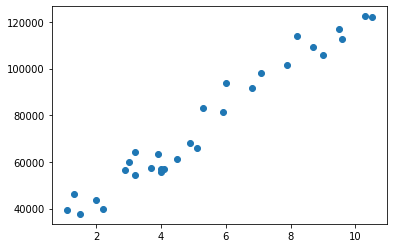

In [10]:
plt.scatter(x= X, y= Y)
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.33,
                                                    random_state = 2)




Train the model

In [12]:
model = LinearRegression(learning_rate=0.01, 
                         number_of_iterations=1000)




In [13]:
model.fit(x_train, y_train)

In [15]:
print('Weight = ', model.m[0])
print('Bias = ', model.b)

Weight =  9580.301196603597
Bias =  23226.38946603212


In [16]:
test_data_prediction = model.predict(x_test)

In [17]:
print(test_data_prediction)

1      35680.781022
0      33764.720782
14     66337.744851
9      58673.503893
21     91246.527962
19     80708.196646
23    101784.859278
6      51967.293056
3      42386.991859
20     88372.437603
dtype: float64


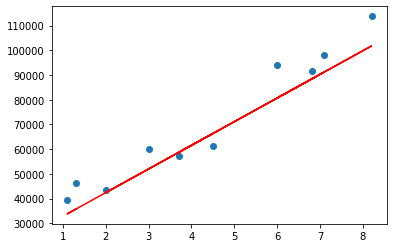

In [18]:
plt.scatter(x= x_test, y= y_test) # plot points
plt.plot(x_test, test_data_prediction, color = 'red') # plot line
plt.show()

In [21]:
re = model.predict(np.array([5]))
round(re)

71128